#### 14. In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the `Auto` data set.
1. Create a binary variable, `mpg01`, that contains a $1$ if `mpg` contains a value above its median, and a $0$ if `mpg` contains a value below its median. You can compute the median using the `median()` method of the data frame. Note you may find it helpful to add a column `mpg01` to the data frame by assignment. Assuming you have stored the data frame as `Auto`, this can be done as follows: `Auto['mpg01'] = mpg01`
2. Explore the data graphically in order to investigate the association between `mpg01` and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.
3. Split the data into a training set and a test set.
4. Perform $\operatorname{LDA}$ on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (2). What is the test error of the model obtained?
5. Perform $\operatorname{QDA}$ on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (2). What is the test error of the model obtained? 
6. Perform naive Bayes on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (2). What is the test error of the model obtained?
7. Perform $\operatorname{KNN}$, with several values of $K$, on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (2). What is the test error of the model obtained? Which value of $K$ seems to perform the best on this data set?

## 1

In [1]:
import numpy as np
import pandas as pd

import ISLP

In [2]:
data: pd.DataFrame = ISLP.load_data("Auto")
data["mpg0"] = np.where(data.mpg > data.mpg.median(), 1, 0)

## 2

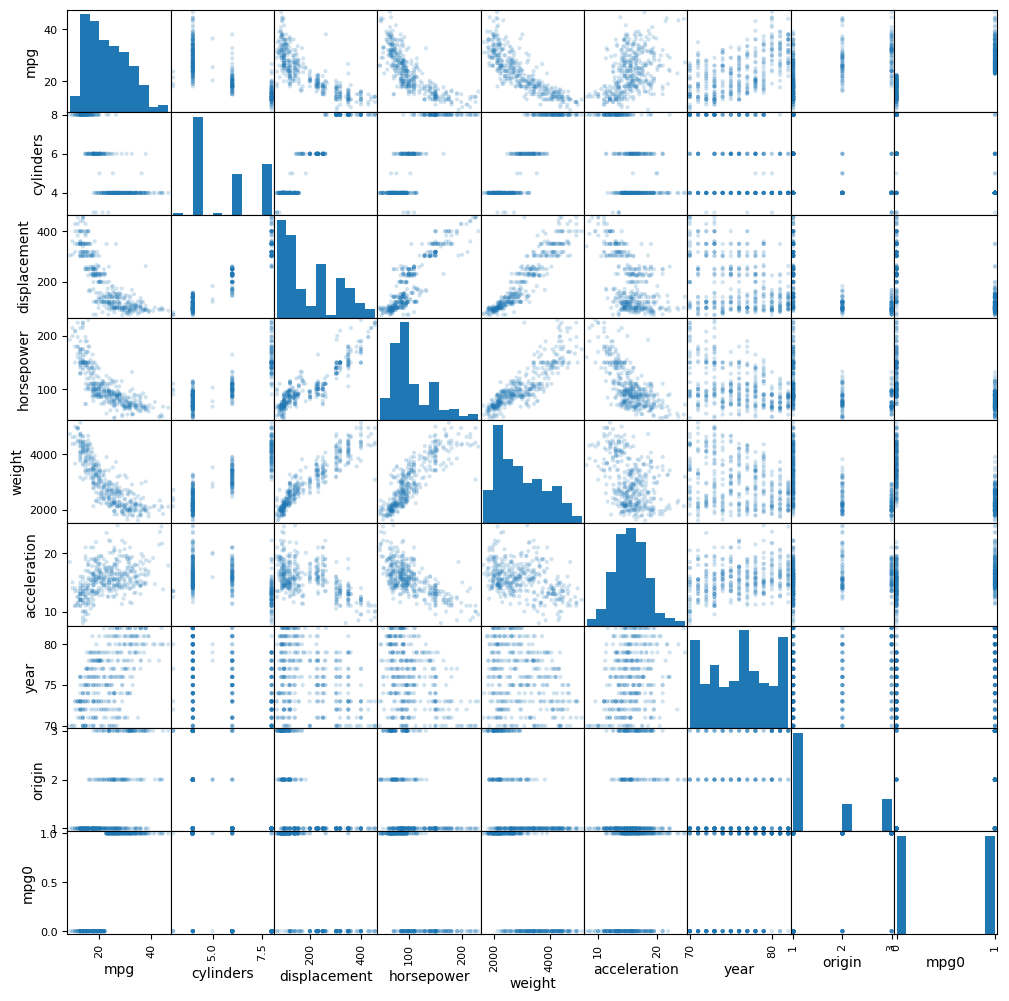

In [3]:
pd.plotting.scatter_matrix(data, alpha=0.2, figsize=(12, 12), diagonal="hist");

In [4]:
data.corr(numeric_only=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg0
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209,0.836939
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,-0.759194
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,-0.753477
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-0.667053
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,-0.757757
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746,0.346822
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528,0.429904
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000,0.513698
mpg0,0.836939,-0.759194,-0.753477,-0.667053,-0.757757,0.346822,0.429904,0.513698,1.000000


## 3

In [5]:
test_pct = 0.2
_rng = np.random.default_rng()
test_idx = _rng.choice(data.index, size=int(len(data) * test_pct), replace=False)

train, test = data.iloc[[idx for idx in data.index if idx not in test_idx]], data.iloc[test_idx]

assert set() == set(train.index).intersection(set(test.index))